DS340 PROJECT

In [4]:
#PHASE 1 --> DATA PREPROCESSING AND EXPLORATORY DATA ANALYSIS
#Step 1: Load train and test datasets
import pandas as pd

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [5]:
train_data.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [6]:
test_data.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,1200000,28.0,Female,2310.0,NaN,4.0,Bachelor's,Self-Employed,7.657981,Rural,Basic,NaN,19.0,NaN,1.0,2023-06-04 15:21:39.245086,Poor,Yes,Weekly,House
1,1200001,31.0,Female,126031.0,Married,2.0,Master's,Self-Employed,13.381379,Suburban,Premium,NaN,14.0,372.0,8.0,2024-04-22 15:21:39.224915,Good,Yes,Rarely,Apartment
2,1200002,47.0,Female,17092.0,Divorced,0.0,PhD,Unemployed,24.354527,Urban,Comprehensive,NaN,16.0,819.0,9.0,2023-04-05 15:21:39.134960,Average,Yes,Monthly,Condo
3,1200003,28.0,Female,30424.0,Divorced,3.0,PhD,Self-Employed,5.136225,Suburban,Comprehensive,1.0,3.0,770.0,5.0,2023-10-25 15:21:39.134960,Poor,Yes,Daily,House
4,1200004,24.0,Male,10863.0,Divorced,2.0,High School,Unemployed,11.844155,Suburban,Premium,NaN,14.0,755.0,7.0,2021-11-26 15:21:39.259788,Average,No,Weekly,House


In [7]:
#Step 2: Merge train and test datasets
merged_data = pd.concat([train_data, test_data], ignore_index = True)
merged_data.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [8]:
merged_data.columns

Index(['id', 'Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Policy Start Date',
       'Customer Feedback', 'Smoking Status', 'Exercise Frequency',
       'Property Type', 'Premium Amount'],
      dtype='object')

In [9]:
#Step 3: Deal with missing data
# --> find out whats missing first
test_data['Premium Amount'] = None 
missing = merged_data.isnull().sum()
missing

id                           0
Age                      31194
Gender                       0
Annual Income            74809
Marital Status           30865
Number of Dependents    182802
Education Level              0
Occupation              597200
Health Score            123525
Location                     0
Policy Type                  0
Previous Claims         606831
Vehicle Age                  9
Credit Score            229333
Insurance Duration           3
Policy Start Date            0
Customer Feedback       130100
Smoking Status               0
Exercise Frequency           0
Property Type                0
Premium Amount          800000
dtype: int64

In [10]:
# --> fill in the number cols with mean
numeric_cols = merged_data.select_dtypes(include='number').columns
for c in numeric_cols:
    if merged_data[c].isnull().sum() > 0:
        merged_data[c] = merged_data[c].fillna(merged_data[c].mean())

In [11]:
# --> fill in the catogorical cols with mode
catog_cols = merged_data.select_dtypes(include='object').columns
for c in catog_cols:
    if merged_data[c].isnull().sum() > 0:
        modes = merged_data[c].mode()
        # from the multiple modes, then choose the most frequent one (the first one)
        if len(modes) > 0:
            mode_val = modes[0]
            merged_data[c] = merged_data[c].fillna(mode_val)
        #if there is no mode at all, just fill unknown
        else:
            merged_data[c] = merged_data[c].fillna("Unknown")

In [12]:
check_missing = merged_data.isnull().sum()
check_missing

id                      0
Age                     0
Gender                  0
Annual Income           0
Marital Status          0
Number of Dependents    0
Education Level         0
Occupation              0
Health Score            0
Location                0
Policy Type             0
Previous Claims         0
Vehicle Age             0
Credit Score            0
Insurance Duration      0
Policy Start Date       0
Customer Feedback       0
Smoking Status          0
Exercise Frequency      0
Property Type           0
Premium Amount          0
dtype: int64

In [13]:
#Step 4: EDA and visualize data
# descriptive statistics
merged_data.describe()

,id,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount
count,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06
mean,9.999995e+05,4.114191e+01,3.276868e+04,2.009695e+00,2.561356e+01,1.003562e+00,9.570690e+00,5.929165e+02,5.018511e+00,1.102545e+03
std,5.773504e+05,1.343310e+01,3.158041e+04,1.350214e+00,1.182192e+01,8.202823e-01,5.774579e+00,1.411718e+02,2.594100e+00,6.700251e+02
min,0.000000e+00,1.800000e+01,1.000000e+00,0.000000e+00,1.646561e+00,0.000000e+00,0.000000e+00,3.000000e+02,1.000000e+00,2.000000e+01
25%,4.999998e+05,3.000000e+01,8.662000e+03,1.000000e+00,1.655488e+01,0.000000e+00,5.000000e+00,4.840000e+02,3.000000e+00,7.320000e+02
50%,9.999995e+05,4.114191e+01,2.499600e+04,2.000000e+00,2.561356e+01,1.000000e+00,1.000000e+01,5.929165e+02,5.000000e+00,1.102545e+03
75%,1.499999e+06,5.300000e+01,4.394000e+04,3.000000e+00,3.376961e+01,1.003562e+00,1.500000e+01,7.060000e+02,7.000000e+00,1.102545e+03
max,1.999999e+06,6.400000e+01,1.499970e+05,4.000000e+00,5.897591e+01,9.000000e+00,1.900000e+01,8.490000e+02,9.000000e+00,4.999000e+03


In [14]:
merged_data.describe(include='object')

,Gender,Marital Status,Education Level,Occupation,Location,Policy Type,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
count,2000000,2000000,2000000,2000000,2000000,2000000,2000000,2000000,2000000,2000000,2000000
unique,2,3,4,3,3,3,173790,3,2,4,3
top,Male,Single,Master's,Employed,Suburban,Premium,2022-08-30 15:21:39.134960,Average,Yes,Weekly,House
freq,1003660,689961,506370,1068524,668732,669475,232,759222,1003732,510693,667500


<Axes: xlabel='Annual Income', ylabel='Count'>

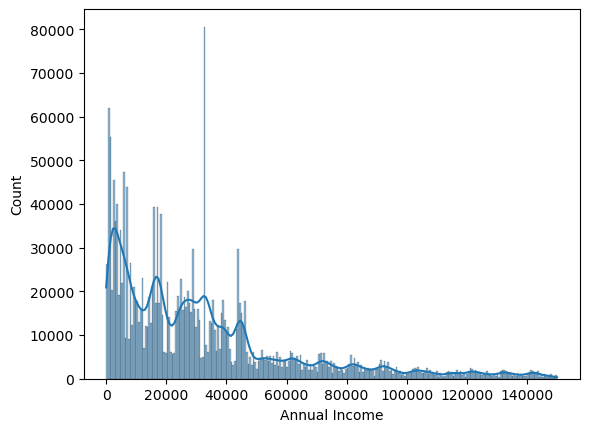

In [15]:
# univariate analysis (histograms for premium amount as an example)
import seaborn as sns
import matplotlib.pyplot as plt

#basically select the training data from the merged data (select the rows where premium amount is not empty)
eda_data = merged_data[merged_data['Premium Amount'].notnull()]

sns.histplot(eda_data['Annual Income'], kde=True)

In [16]:
#shows that there are less people with higher income

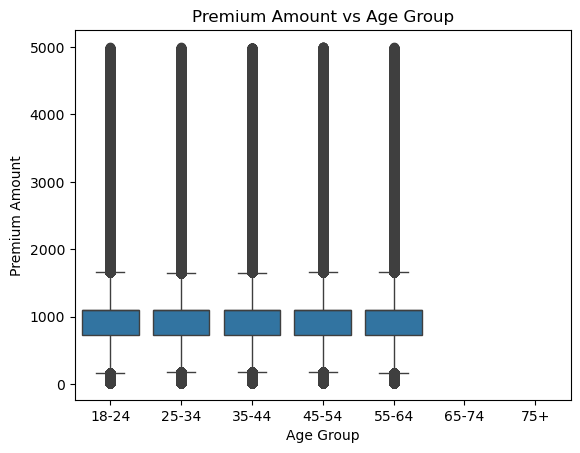

In [17]:
bins = [18, 25, 35, 45, 55, 65, 75, 100] 
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75+']
eda_data['Age Group'] = pd.cut(eda_data['Age'], bins=bins, labels=labels, right=False)

eda_data = eda_data.dropna(subset=['Age Group'])

sns.boxplot(x='Age Group', y='Premium Amount', data=eda_data)
plt.title('Premium Amount vs Age Group')
plt.xlabel('Age Group')
plt.ylabel('Premium Amount')
plt.show()

In [18]:
#The bivariate analysis between Age and Premium shows no particular relation between the dependent and target variable.
#It is very dense with lots of data point, resulting in the large number of outliers --> shows high variance and the influence of other variables.  

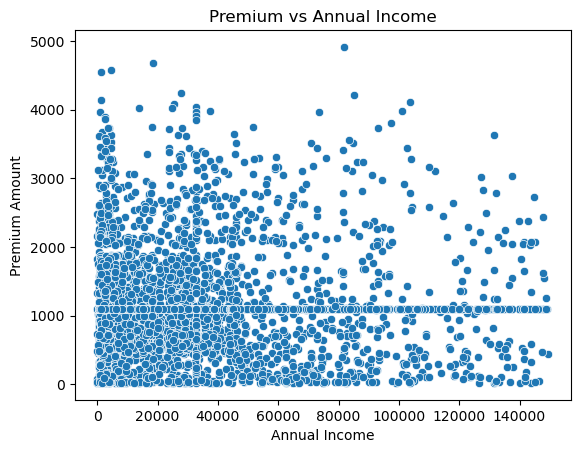

In [19]:
#bivariate
sample = eda_data[['Annual Income', 'Premium Amount']].dropna().sample(5000)
sns.scatterplot(x='Annual Income', y='Premium Amount', data=sample)
plt.title('Premium vs Annual Income')
plt.show()

In [20]:
#Like the boxplot, this graph is also very dense despite taking a sample. This one also shows no particular relationship, showing there 
# might be other factors affecting the target variable. 

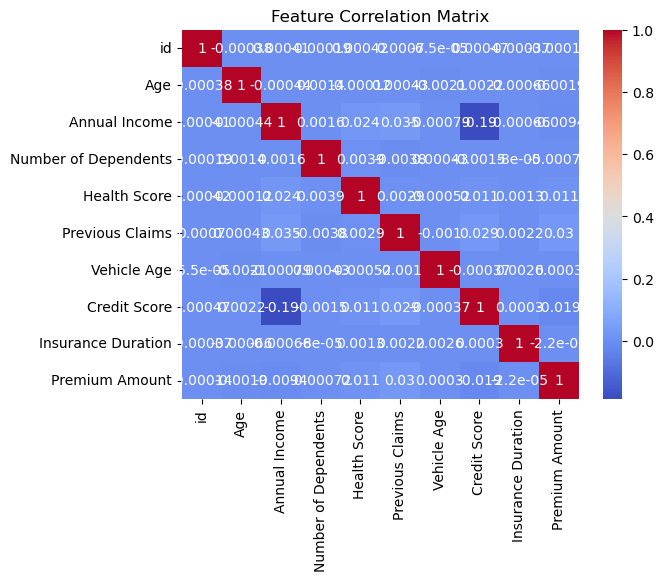

In [21]:
#multivariate heatmap for all the variables
corr = eda_data.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()
#ignore ID, does not impact premium amounts

In [22]:
# This heat map represents a multivariate analysis, where we take all the variables and test their correlation to the target. 
# In this case, no variable has a strong correlation, since all the correlation coefficients are less than 0.2, showing a weak linear relationship. 

In [23]:
#step 5: split the training data into train/validation 80-20 split 
X = train_data.drop(columns='Premium Amount')
y = train_data['Premium Amount']

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
#PHASE2 --> MODEL DEVELOPMENT AND TUNING
#Step 6: binary encoding for gender and smokers

#maps for gender and smoker status
gender_map = {'Male': 1, 'Female': 0}
smoke_map = {'Yes': 1, 'No': 0}

#iterate over the three datasets
for df in [X_train, X_val, test_data]:
    #for the gender column
    if 'Gender' in df.columns:
        #convert to numeric values, and replace any missing values with 0
        df['Gender'] = df['Gender'].map(gender_map).fillna(0)
    #same with smoking status
    if 'Smoking Status' in df.columns:
        df['Smoking Status'] = df['Smoking Status'].map(smoke_map).fillna(0)

In [25]:
#Step 7: Ordinal encoding for categories with order 

#define maps
edu_map = {'High School': 1, 'Bachelor': 2, 'Master': 3, 'PhD': 4}
exercise_map = {'Rarely': 1, 'Monthly': 2, 'Weekly': 3, 'Daily': 4}

#iterate mapping for datasets
for df in [X_train, X_val, test_data]:
    df['Education Level'] = df['Education Level'].map(edu_map)
    df['Exercise Frequency'] = df['Exercise Frequency'].map(exercise_map)

#if the mode is zero, then set the values to something default
edu_mode = X_train['Education Level'].mode()
edu_mode = edu_mode[0] if not edu_mode.empty else 1  # default to 1 = High School
exercise_mode = X_train['Exercise Frequency'].mode()
exercise_mode = exercise_mode[0] if not exercise_mode.empty else 1  # default to 1 = Rarely

#then, fill in the value with the mode
for df in [X_train, X_val, test_data]:
    df['Education Level'].fillna(edu_mode, inplace=True)
    df['Exercise Frequency'].fillna(exercise_mode, inplace=True)

/var/folders/_h/b34996m51sb595dtyp0k7l300000gn/T/ipykernel_20686/872360864.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Education Level'].fillna(edu_mode, inplace=True)
/var/folders/_h/b34996m51sb595dtyp0k7l300000gn/T/ipykernel_20686/872360864.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

In [26]:
#Step 8: Target encoding for other catogorical columns

target_encode_cols = ['Occupation', 'Property Type', 'Policy Type', 'Location', 'Customer Feedback']

#Fill null values with 'Unknown'
for col in target_encode_cols:
    for df in [X_train, X_val, test_data]:
        df[col].fillna('Unknown', inplace=True)

train_temp = X_train.copy()
#add target column
train_temp['Premium Amount'] = y_train
#compute overall average
global_mean = y_train.mean()

for col in target_encode_cols:
    #get target mean
    target_mean = train_temp.groupby(col)['Premium Amount'].mean()
    #apply to all datasets
    for df in [X_train, X_val, test_data]:
        df[col] = df[col].map(target_mean)
        df[col].fillna(global_mean, inplace=True)

/var/folders/_h/b34996m51sb595dtyp0k7l300000gn/T/ipykernel_20686/292148112.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('Unknown', inplace=True)
/var/folders/_h/b34996m51sb595dtyp0k7l300000gn/T/ipykernel_20686/292148112.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [27]:
#more feature engineering --> ordinal for marital status
marital_map = {'Married': 1, 'Single': 0, 'Divorced': 2}

for df in [X_train, X_val, test_data]:
    df['Marital Status'] = df['Marital Status'].fillna('Single') 
    df['Marital Status'] = df['Marital Status'].map(marital_map).fillna(0)

In [28]:
#drop the policy start date
for df in [X_train, X_val, test_data]:
    df.drop(columns=['Policy Start Date'], inplace=True, errors='ignore')

In [29]:
for col in ['Age', 'Annual Income', 'Number of Dependents','Health Score', 'Previous Claims', 'Vehicle Age',
            'Credit Score', 'Insurance Duration']:
    #for the numeric cols, fill in with the median
    median_val = X_train[col].median()
    X_train[col].fillna(median_val, inplace=True)
    X_val[col].fillna(median_val, inplace=True)
    test_data[col].fillna(median_val, inplace=True)

/var/folders/_h/b34996m51sb595dtyp0k7l300000gn/T/ipykernel_20686/1614689093.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train[col].fillna(median_val, inplace=True)
/var/folders/_h/b34996m51sb595dtyp0k7l300000gn/T/ipykernel_20686/1614689093.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always 

In [30]:
#check if the catogorical columns are converted to int/ float, and then check for missing values
print(X_train.dtypes)
print(X_train.isnull().sum().sum())

id                        int64
Age                     float64
Gender                    int64
Annual Income           float64
Marital Status            int64
Number of Dependents    float64
Education Level         float64
Occupation              float64
Health Score            float64
Location                float64
Policy Type             float64
Previous Claims         float64
Vehicle Age             float64
Credit Score            float64
Insurance Duration      float64
Customer Feedback       float64
Smoking Status            int64
Exercise Frequency        int64
Property Type           float64
dtype: object
0


In [70]:

from sklearn.preprocessing import StandardScaler

numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
#Standerdized Scaling
scaler = StandardScaler()

X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_val[numeric_cols] = scaler.transform(X_val[numeric_cols])
test_data[numeric_cols] = scaler.transform(test_data[numeric_cols])

In [72]:
#step 9: train a baseline regressor model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [74]:
#step 10: evaluate model performance
from sklearn.metrics import mean_squared_error, mean_squared_log_error
import numpy as np

val_predic = model.predict(X_val)
# RMSE
rmse = np.sqrt(mean_squared_error(y_val, val_predic))
print("Linear Regression RMSE:", round(rmse, 2))

# RMSLE
val_preds_clipped = np.maximum(0, val_predic)
y_val_clipped = np.maximum(0, y_val)
rmsle = np.sqrt(mean_squared_log_error(y_val_clipped, val_preds_clipped))
print("Linear Regression RMSLE:", round(rmsle, 2))

Linear Regression RMSE: 863.01
Linear Regression RMSLE: 1.17


In [34]:
#step 11: test model on test data
test_preds = model.predict(test_data[X_train.columns]) 
test_preds = np.maximum(0, test_preds)

In [35]:
#step 12: make a submission file
sample = pd.read_csv('sample_submission.csv')
submission = sample.copy()
submission['Premium Amount'] = test_preds

In [36]:
#step 13: export
submission.to_csv('submission.csv', index=False)